Install pandas an sklearn

In [1]:
!pip install pandas scikit-learn tensorflow


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load data set to the dataframe

In [3]:
import pandas as pd
dataSetLocation = "./dataset/mendeley-LG18650HG2.csv"
dataFrame = pd.read_csv(dataSetLocation)

remove unused column (timeDiff and variant)

In [4]:
print(dataFrame.head())
print(dataFrame["SOC"].min())
print(dataFrame["SOC"].max())


    voltage  current  temperature  averageVoltage  averageCurrent       SOC
0  0.385148  0.75102     0.303101        0.385148         0.75102  0.206417
1  0.385152  0.75102     0.304591        0.385150         0.75102  0.206417
2  0.385156  0.75102     0.306081        0.385152         0.75102  0.206417
3  0.385160  0.75102     0.307572        0.385154         0.75102  0.206417
4  0.385164  0.75102     0.309062        0.385156         0.75102  0.206417
0.0628222157184988
1.0004364760721152


Check Data Dimension

In [5]:
print(dataFrame.shape)

(669956, 6)


Check Mean,Median,Mode, Quartile, Standard Deviation

In [6]:
numeric_cols = dataFrame.select_dtypes(include=['number']).columns

stats_list = []
for col in numeric_cols:
    stats = {
        'Column': col,
        'Mean': dataFrame[col].mean(),
        'Median': dataFrame[col].median(),
        'Mode': dataFrame[col].mode().values[0] if not dataFrame[col].mode().empty else None,
        'Q1': dataFrame[col].quantile(0.25),
        'Q3': dataFrame[col].quantile(0.75),
        'Std Dev': dataFrame[col].std()
    }
    stats_list.append(stats)

descriptiveStatisticDataFrame = pd.DataFrame(stats_list)
print(descriptiveStatisticDataFrame)

           Column      Mean    Median      Mode        Q1        Q3   Std Dev
0         voltage  0.710843  0.749018  0.977513  0.484394  0.970067  0.252053
1         current  0.752365  0.751020  0.751020  0.751020  0.762989  0.079163
2     temperature  0.672214  0.915628  0.917845  0.322932  0.925131  0.332360
3  averageVoltage  0.710363  0.748360  0.977513  0.484137  0.969918  0.247668
4  averageCurrent  0.752353  0.751020  0.751020  0.724062  0.754660  0.056138
5             SOC  0.640461  0.702539  1.000000  0.292033  0.993671  0.333134


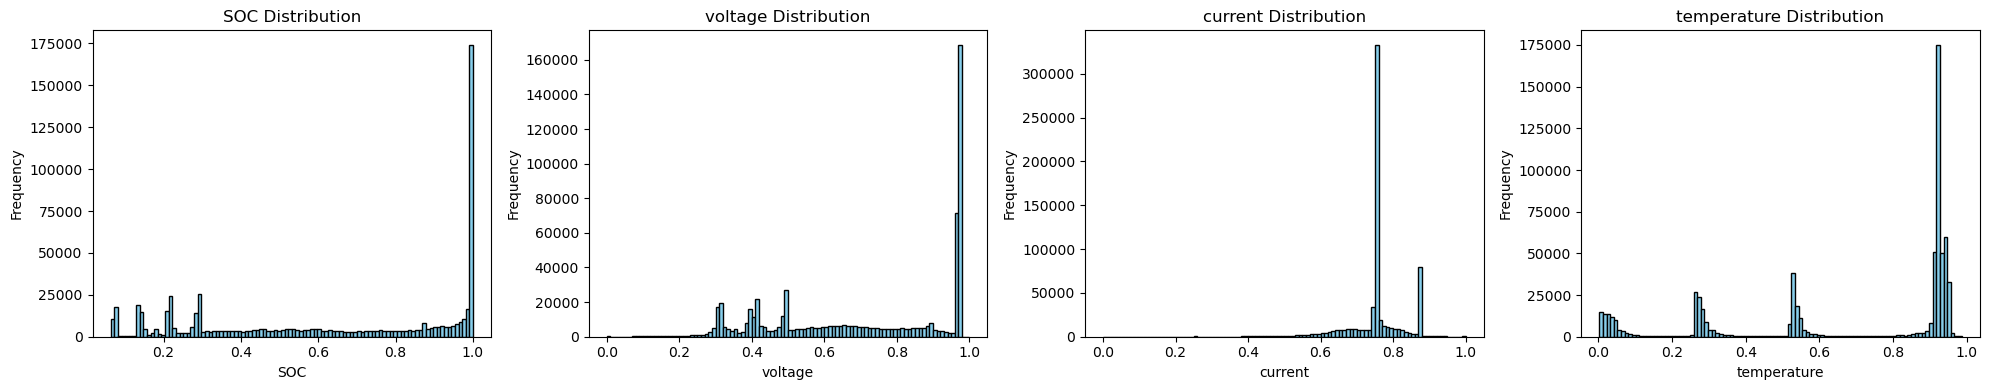

In [7]:
import matplotlib.pyplot as plt

features = ["SOC", "voltage", "current",  "temperature"]
num_features = len(features)

plt.figure(figsize=(5 * num_features, 4))

for i, feature in enumerate(features):
    plt.subplot(1, num_features, i + 1)
    plt.hist(dataFrame[feature], bins=100, color="skyblue", edgecolor="black")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"{feature} Distribution")

plt.tight_layout()
plt.show()


Split X (Feature: Current, Voltage, CapacityDiff, BatteryCapacity) and Y (target: SOC)

In [10]:
Y = dataFrame['SOC']
X = dataFrame.drop('SOC', axis=1)
print("feature: ")
print(X)
print("target: ")
print(Y)

feature: 
         voltage  current  temperature  averageVoltage  averageCurrent
0       0.385148  0.75102     0.303101        0.385148         0.75102
1       0.385152  0.75102     0.304591        0.385150         0.75102
2       0.385156  0.75102     0.306081        0.385152         0.75102
3       0.385160  0.75102     0.307572        0.385154         0.75102
4       0.385164  0.75102     0.309062        0.385156         0.75102
...          ...      ...          ...             ...             ...
669951  0.478843  0.75102     0.008477        0.459558         0.75102
669952  0.478843  0.75102     0.008477        0.459699         0.75102
669953  0.478843  0.75102     0.008477        0.459839         0.75102
669954  0.478961  0.75102     0.008477        0.459979         0.75102
669955  0.478961  0.75102     0.008477        0.460117         0.75102

[669956 rows x 5 columns]
target: 
0         0.206417
1         0.206417
2         0.206417
3         0.206417
4         0.206417
       

Split 0.3 for test, 0.7 for training

In [17]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

Normalize

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train & Evaluate using TensorFlow

Epoch 1/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 11s 764us/step - loss: 0.0102 - mae: 0.0359 - val_loss: 6.5613e-04 - val_mae: 0.0157
Epoch 2/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 548us/step - loss: 5.7639e-04 - mae: 0.0147 - val_loss: 5.5315e-04 - val_mae: 0.0155
Epoch 3/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 557us/step - loss: 5.2037e-04 - mae: 0.0136 - val_loss: 5.0183e-04 - val_mae: 0.0130
Epoch 4/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 550us/step - loss: 5.0702e-04 - mae: 0.0130 - val_loss: 5.2351e-04 - val_mae: 0.0127
Epoch 5/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 541us/step - loss: 4.8951e-04 - mae: 0.0125 - val_loss: 4.8612e-04 - val_mae: 0.0127
Epoch 6/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 541us/step - loss: 4.9149e-04 - mae: 0.0124 - val_loss: 4.6409e-04 - val_mae: 0.0111
Epoch 7/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 550us/step - loss: 4.7883e-04 - mae: 0.0120 - val_loss: 4.5621e-04 - val_mae: 0.0113
Epoch 8/100
13400/13400 ━━━━━━━━━━━━━━━━━━━━ 7s 541us/step - loss: 4.729

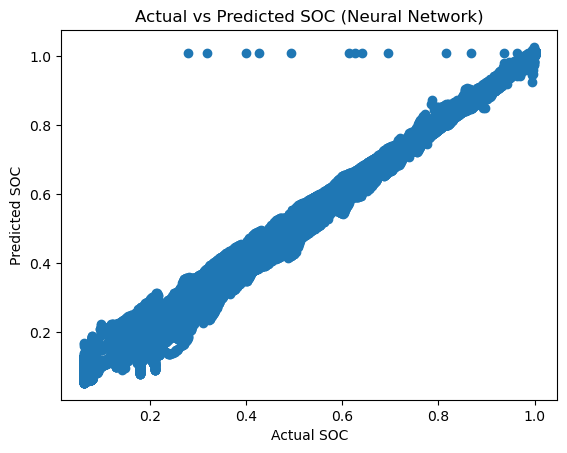

CPU times: user 16min 2s, sys: 1min 32s, total: 17min 34s
Wall time: 13min 24s


In [20]:
%%time
# Neural network Model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dense(16, activation='relu'),                            
    tf.keras.layers.Dense(1, activation='linear')                           
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)


# Output the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual SOC")
plt.ylabel("Predicted SOC")
plt.title("Actual vs Predicted SOC (Neural Network)")
plt.show()